# Statistics

Objectives of this notebook : 

- Find correlation between several variables

In [14]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
# usual functions (you can put them in a module and import it)

# mean
def mean(s):
    return np.mean(s)

# standard deviation
def std(s):
    return np.std(s)

# variance
def var(s):
    return np.var(s)

# covariance
def cov(x,y):
    return np.cov(x,y, bias = True)[0,1]

# correlation
def corr(x,y):
    return np.corrcoef(x,y)[0,1]

# skewness
def skew(s):
    return st.skew(s)

# kurtosis
def kurt(s):
    return st.kurtosis(s)

def stats(s):
    print(f'nobs = {len(s)}, minmax = {min(s), max(s)}, mean = {mean(s)}, std = {std(s)}, skewness = {skew(s)}, kurtosis = {kurt(s)}')

In [16]:
df = pd.read_csv("nba_player_stats_C_Rami.csv")
df

,Player,Team,Points,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Trp-Dbl,Season
0,Luka Dončić,DAL,2370.0,PG,70.0,70.0,2624.0,804.0,1652.0,0.487,...,59.0,588.0,647.0,686.0,99.0,38.0,282.0,149.0,21.0,2024
1,Shai Gilgeous-Alexander,OKC,2254.0,PG,75.0,75.0,2553.0,796.0,1487.0,0.535,...,65.0,350.0,415.0,465.0,150.0,67.0,162.0,184.0,0.0,2024
2,Giannis Antetokounmpo,MIL,2222.0,PF,73.0,73.0,2567.0,837.0,1369.0,0.611,...,196.0,645.0,841.0,476.0,87.0,79.0,250.0,210.0,10.0,2024
3,Jalen Brunson,NYK,2212.0,PG,77.0,77.0,2726.0,790.0,1648.0,0.479,...,43.0,235.0,278.0,519.0,70.0,13.0,186.0,144.0,0.0,2024
4,Nikola Jokić,DEN,2085.0,C,79.0,79.0,2737.0,822.0,1411.0,0.583,...,223.0,753.0,976.0,708.0,108.0,68.0,237.0,194.0,25.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17808,Yinka Dare,NJN,0.0,C,1.0,0.0,3.0,0.0,1.0,0.000,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1995
17809,Tom Hovasse,ATL,0.0,SF,2.0,0.0,4.0,0.0,1.0,0.000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1995
17810,Rich King,SEA,0.0,C,2.0,0.0,6.0,0.0,2.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1995
17811,Derrick Phelps,SAC,0.0,PG,3.0,0.0,5.0,0.0,1.0,0.000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1995


## Section 1 : Bivariate Descriptive Statistics

In this section, I am providing you the tools to analyse the relations between two variables. There are 3 cases.

- 2 Numerical Variable
- 1 Numerical & 1 Categorical
- 2 Categorical

#### Two Numerical Variables

1. Scatter Plot

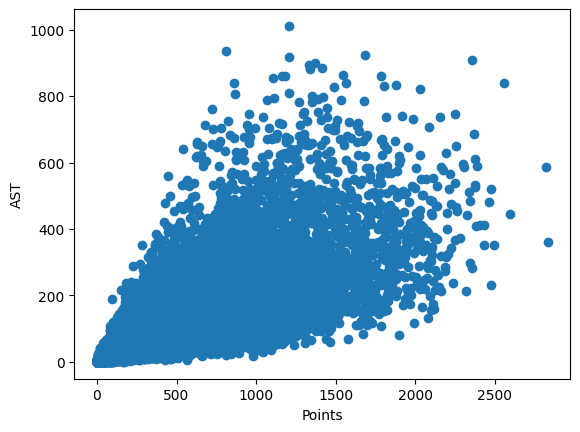

In [18]:
a = input("Field for x axis")
b = input("Field for y axis")
x,y = df[a].fillna(0), df[b].fillna(0)
plt.scatter(x,y)
plt.xlabel(a)
plt.ylabel(b)
plt.show()

2. The covariance : It measures joint variability between two random variables.

Interpretation : 
- A high positive value suggests an association exists between the variables, indicating that they tend to vary together.
- A negative value indicates that the variables tend to move in opposite directions.

In [19]:
np.cov(x,y) #If Nan Appears, you fight need to filter records having Nan.

array([[202486.8302    ,  42031.76308987],
       [ 42031.76308987,  15458.64511478]])

3. The Linear Correlation Coefficient is a statistical measure that quantifies the strength and direction of a linear relationship between two variables. 

Interpretation : 
- 1 indicates a strong positive linear relationship,
- -1 indicates a strong negative linear relationship,
- 0 indicates no linear relationship

In [20]:
np.corrcoef(x,y)

array([[1.       , 0.7512656],
       [0.7512656, 1.       ]])

Conclusion : If you end up with something far from 0 at this point, you might want to make a regression because the variance of one variable is linked to the other one.

#### One Categorical And One Numerical variable

1. Boxplot

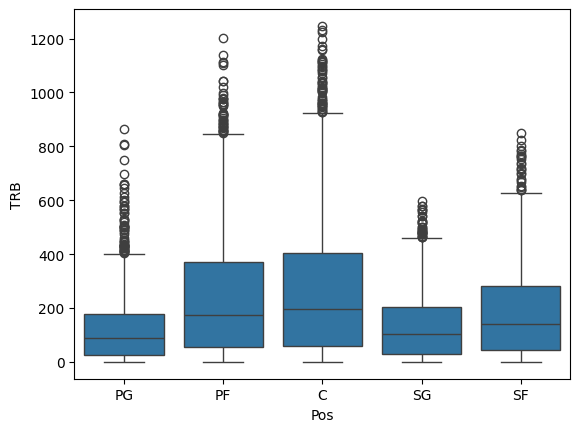

In [22]:
a = input("Field for Categorical")
b = input("Field for Numerical")

sns.boxplot(data = df, x = a, y = b, orient = 'v')
plt.show()

Here, we want to know what causes the Variance. Is it inter-class or Intra-class. 

In [23]:
N = len(df[b])
np.var(df[b]), df[b].var()*(N-1)/N, df[b].var(ddof = 0)

mi = df.groupby(a).mean() 
si2 = df.groupby('cartel').var(ddof = 0) 

df[b].value_counts()
ni = df.groupby(b).count() 

intra = np.sum(ni * si2, axis = 0)/N
miu = sum(df[b])/len(df[b])
inter = np.sum(ni*(mi-miu)**2, axis = 0)/N

i= inter/(inter + intra)

i

TypeError: agg function failed [how->mean,dtype->object]

Here, we computed the Empirical Correlation Ratio. What that means is that it is a number between 0 and 1.

Interpretation : 

- When it is 0, the variance is only caused by inter-class variance
- When it is 1, the variance is only caused by intra-class variance. The closest to this value, the more there is correlation between the variables.

#### Two Categorical Variables

We will skip the plotting because I struggle with this. If someone is kind enough to do it, i'd be happy.

You will need to create a contingency table in order to use your data. You will then perform a Chi-square independence test and hope that you reject H0

## Section 2 : Regression

Now, we have seen that there is a link between some variables. When scattered, you sometime now that there is a pattern. We now want to know if it's true and get several information : 

- What is this pattern as a function? (regression in itself)
- Can we predict? (Prediction of values and Confidence interval for the predictions)

We are given tools to analyze to type of linear models : 

1. $ a + bx + cx^2 $ Multiple Linear Regression
2. $ a + bx $ Simple linear Regression

Note that we can linearize some models throught tough calculations that we have seen in High-School.

#### Least Square Regression Line

We will first need to find if we can perform a good regression by determining the least square regression line. (finding values of a and b)

In [ ]:
a = input("Field for x")
b = input("Field for y")

x = df[a]
y = df[b]
sns.scatterplot(x = x, y = y)
plt.show()

n = len(x)
mx = mean(x)
sx = std(x)
my = mean(y)
sy = std(y)
r = corr(x,y) # correlation coefficient
n, mx, sx, my, sy, r

In [ ]:
lr = st.linregress(x, y)
print(lr,type(lr))

If the r-value-squared is close to 1, the proportion of the variance explained by the variance is important meaning that prediction is going to be precise. 

In [ ]:
fit = np.polyfit(x,y, 1) # linear fitting
print(fit) # slope and value at the origin (b and a in this order)
poly = np.poly1d(fit) # create the line poly parametrized by fit
sns.scatterplot(x = x, y = y)
z = [min(x)*0.95,max(x)*1.05]
plt.plot(z,poly(z),'r-', linewidth = 1)
plt.show()